# MLP
Mean RCI over 14 cell lines.

This notebook uses
mRNA, canonical, yes middle-exclusion train, no middle-exclusion test, 0 threshold, learning module, cross-validation.



In [1]:
SEED = 45
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 20:37:38.662228


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = 0  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = True
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = True
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -1   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         =  1   #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.pc_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.pc_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_pc_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_pc_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 20:37:56.389139
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.pc_RCI.all_cell_lines.csv
Number of RCI values loaded 13663
Num RCI: 13663
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_pc_transcripts.csv
Loaded 13663 sequences.

Training # 1 1
2023-04-29 20:38:53.038522
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2410:2306 51.10%
Computed class weights: {0: 1.0225498699045967, 1: 0.9784232365145228}
Valid 1:0 1402:1331 51.30%
FIT


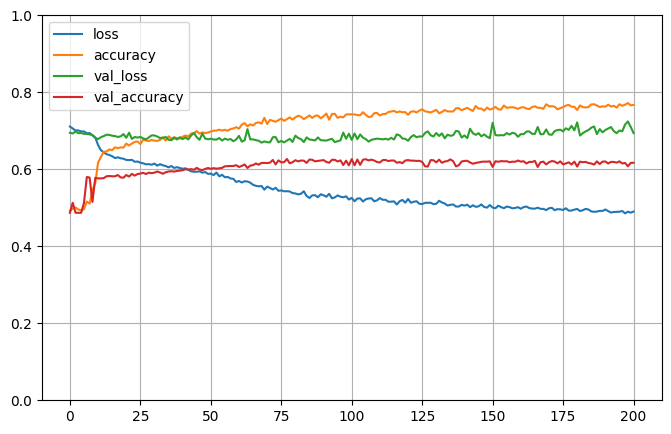


Testing # 1 1
2023-04-29 20:42:17.504212
PREDICT
Test 1:0 1402:1331 51.30%
Predict 1:0 1339:1394 48.99%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.47991946 mean 0.24454103 std
Range of scores: 0.011515251 to 0.9875409
Score threshold 0.5
Confusion matrix
 [[852 479]
 [542 860]]
Normalized matrix
 [[0.31174533 0.17526528]
 [0.19831687 0.31467252]]
Extreme scores correct, pos:neg 566 602
Extreme scores incorrect pos:neg 248 331


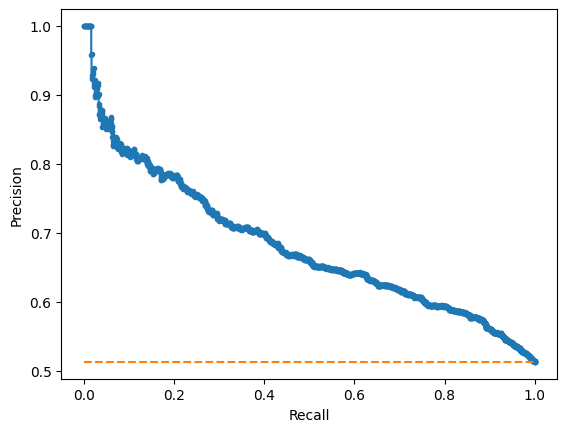

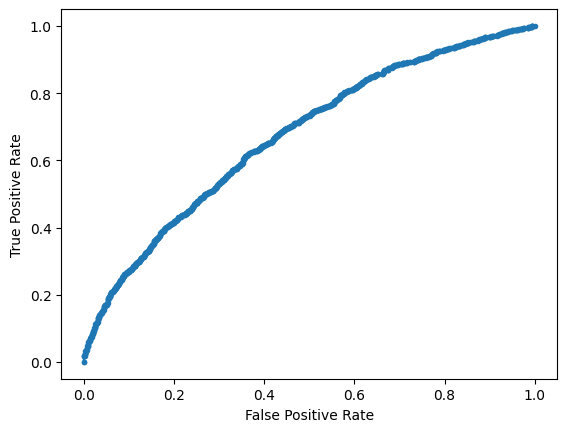

Accuracy: 62.64% Precision: 64.23% Recall: 61.34%
F1: 62.75% MCC: 0.2535
AUPRC: 68.11% AUROC: 67.31%
 accuracy [62.641785583607756]
 precision [64.22703510082151]
 recall [61.34094151212553]
 F1 [62.75082086829625]
 MCC [0.25349539483322286]
 AUPRC [68.10511643451251]
 AUROC [67.3149123662558]

Training # 1 2
2023-04-29 20:42:18.410532
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2345:2366 49.78%
Computed class weights: {0: 0.9955621301775148, 1: 1.0044776119402985}
Valid 1:0 1475:1258 53.97%
FIT


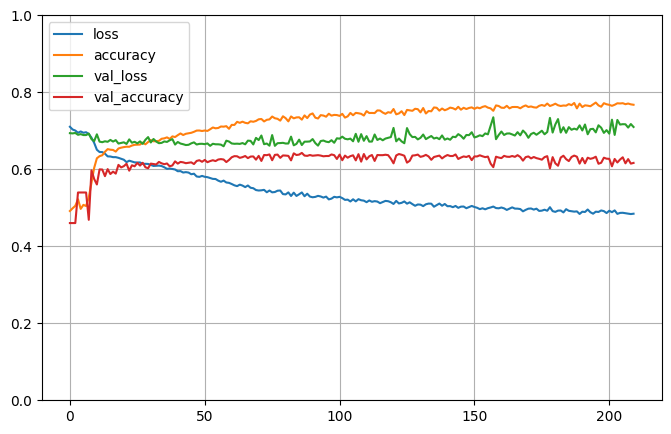


Testing # 1 2
2023-04-29 20:45:33.334425
PREDICT
Test 1:0 1475:1258 53.97%
Predict 1:0 1466:1267 53.64%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.51477104 mean 0.25615117 std
Range of scores: 0.021790473 to 0.9932397
Score threshold 0.5
Confusion matrix
 [[770 488]
 [497 978]]
Normalized matrix
 [[0.28174168 0.17855836]
 [0.18185145 0.35784852]]
Extreme scores correct, pos:neg 692 548
Extreme scores incorrect pos:neg 293 293


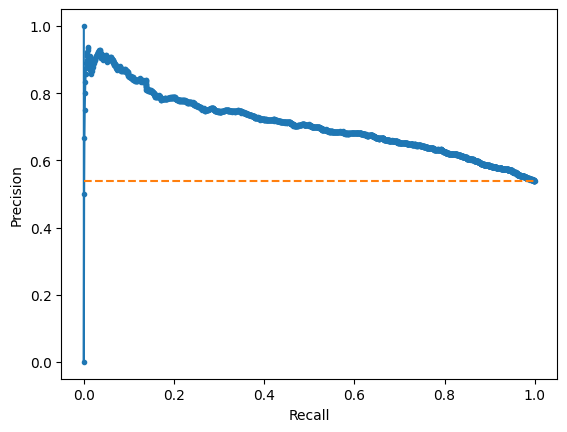

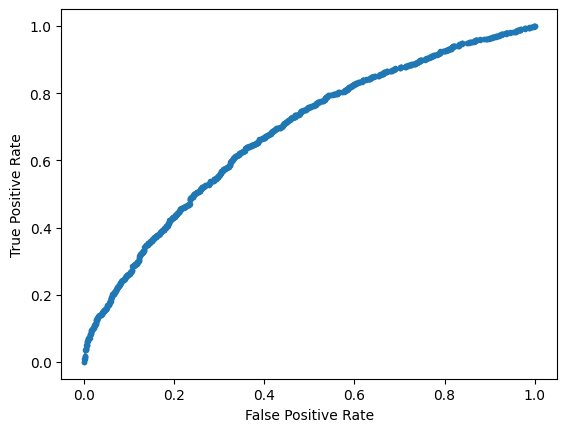

Accuracy: 63.96% Precision: 66.71% Recall: 66.31%
F1: 66.51% MCC: 0.2750
AUPRC: 70.76% AUROC: 68.21%
 accuracy [63.95901939260885]
 precision [66.71214188267395]
 recall [66.30508474576271]
 F1 [66.50799047942877]
 MCC [0.27499483695893007]
 AUPRC [70.75857928382668]
 AUROC [68.20824014443157]

Training # 1 3
2023-04-29 20:45:34.243362
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2385:2303 50.87%
Computed class weights: {0: 1.017802865827182, 1: 0.9828092243186582}
Valid 1:0 1448:1285 52.98%
FIT


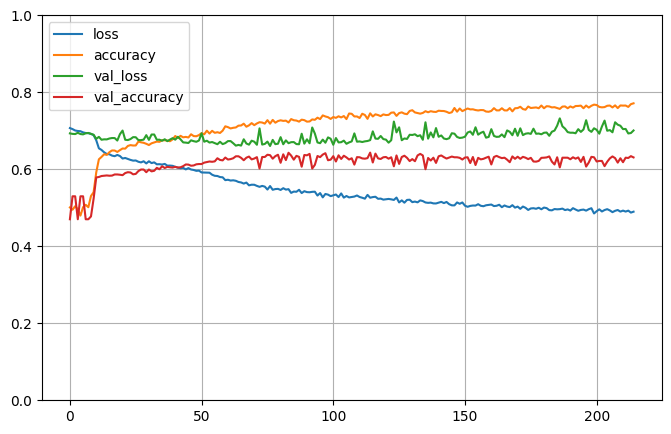


Testing # 1 3
2023-04-29 20:49:58.493584
PREDICT
Test 1:0 1448:1285 52.98%
Predict 1:0 1665:1068 60.92%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.55962473 mean 0.24778394 std
Range of scores: 0.022398993 to 0.9911205
Score threshold 0.5
Confusion matrix
 [[ 689  596]
 [ 379 1069]]
Normalized matrix
 [[0.25210392 0.21807538]
 [0.13867545 0.39114526]]
Extreme scores correct, pos:neg 796 444
Extreme scores incorrect pos:neg 386 217


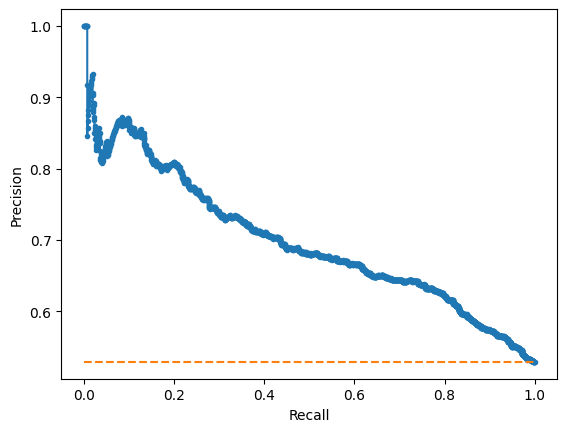

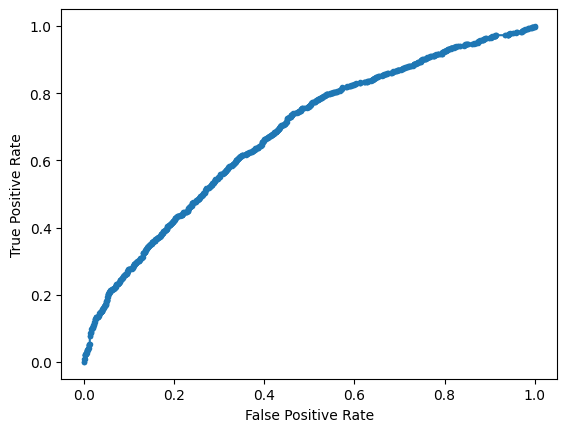

Accuracy: 64.32% Precision: 64.20% Recall: 73.83%
F1: 68.68% MCC: 0.2807
AUPRC: 69.87% AUROC: 67.92%
 accuracy [64.32491767288694]
 precision [64.2042042042042]
 recall [73.82596685082873]
 F1 [68.6797301638291]
 MCC [0.28073767539893385]
 AUPRC [69.86576452482991]
 AUROC [67.91659500827653]

Training # 1 4
2023-04-29 20:49:59.396292
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2401:2309 50.98%
Computed class weights: {0: 1.0199220441749675, 1: 0.9808413161182841}
Valid 1:0 1398:1334 51.17%
FIT


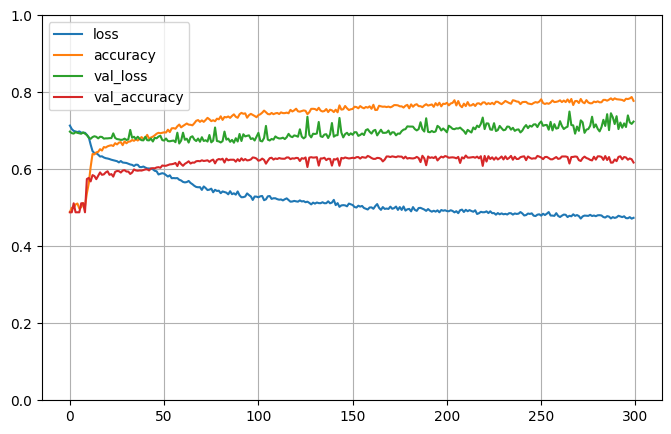


Testing # 1 4
2023-04-29 20:55:23.767698
PREDICT
Test 1:0 1398:1334 51.17%
Predict 1:0 929:1803 34.00%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.40651757 mean 0.26714155 std
Range of scores: 0.023941508 to 0.973547
Score threshold 0.5
Confusion matrix
 [[1046  288]
 [ 757  641]]
Normalized matrix
 [[0.38286969 0.10541728]
 [0.27708638 0.23462665]]
Extreme scores correct, pos:neg 443 864
Extreme scores incorrect pos:neg 158 536


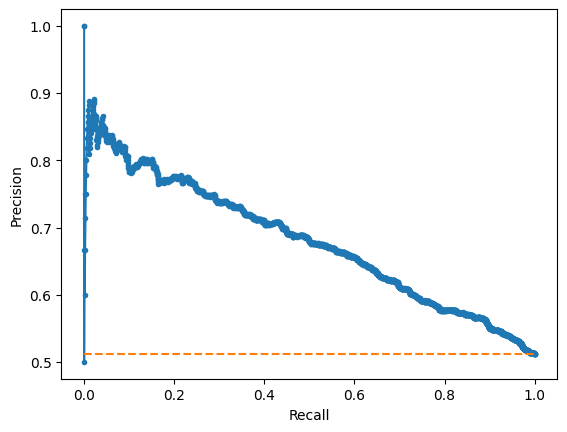

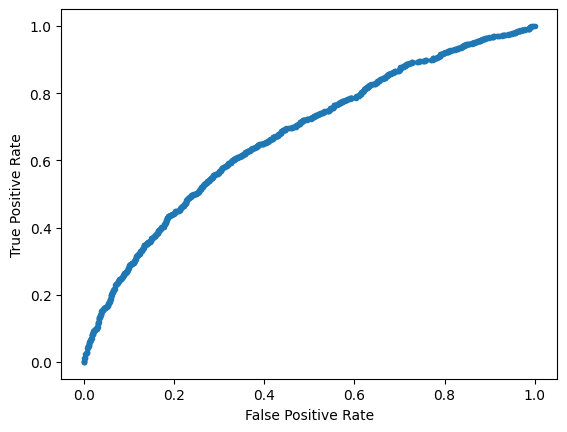

Accuracy: 61.75% Precision: 69.00% Recall: 45.85%
F1: 55.09% MCC: 0.2560
AUPRC: 67.92% AUROC: 67.46%
 accuracy [61.749633967789165]
 precision [68.9989235737352]
 recall [45.851216022889844]
 F1 [55.09239363987967]
 MCC [0.25600742934071696]
 AUPRC [67.92117426030617]
 AUROC [67.46409520561608]

Training # 1 5
2023-04-29 20:55:24.704844
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2355:2340 50.16%
Computed class weights: {0: 1.0032051282051282, 1: 0.9968152866242038}
Valid 1:0 1445:1287 52.89%
FIT


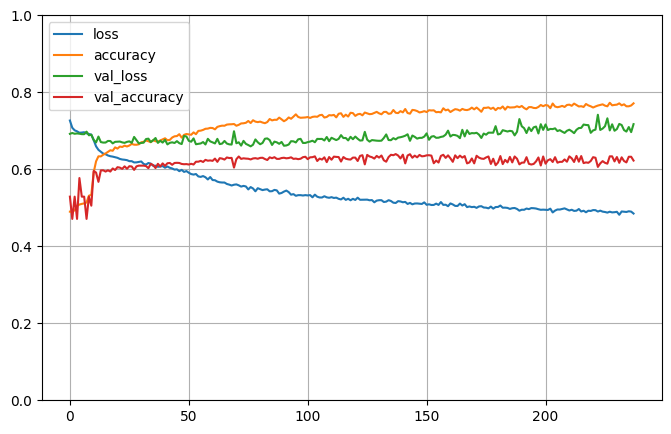


Testing # 1 5
2023-04-29 20:59:48.651632
PREDICT
Test 1:0 1445:1287 52.89%
Predict 1:0 1508:1224 55.20%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.5237795 mean 0.2551095 std
Range of scores: 0.0039824066 to 0.9876377
Score threshold 0.5
Confusion matrix
 [[763 524]
 [461 984]]
Normalized matrix
 [[0.27928258 0.19180088]
 [0.16874085 0.3601757 ]]
Extreme scores correct, pos:neg 705 525
Extreme scores incorrect pos:neg 319 271


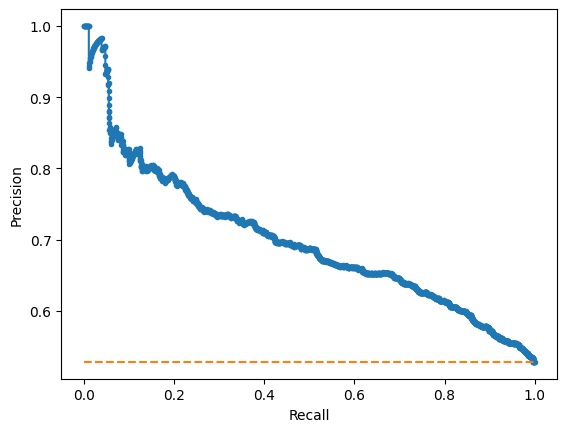

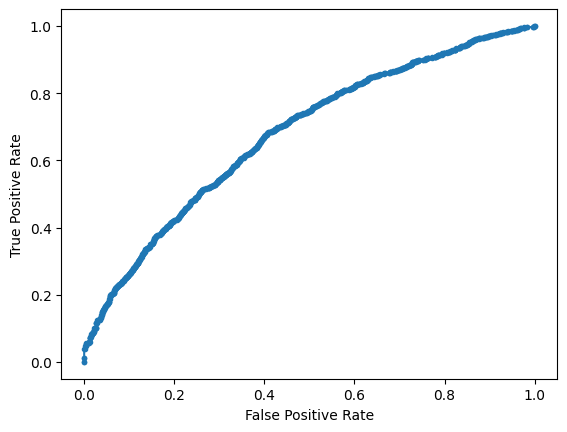

Accuracy: 63.95% Precision: 65.25% Recall: 68.10%
F1: 66.64% MCC: 0.2749
AUPRC: 69.86% AUROC: 67.73%
 accuracy [63.94582723279648]
 precision [65.25198938992042]
 recall [68.09688581314879]
 F1 [66.64409075516424]
 MCC [0.2748512387941935]
 AUPRC [69.86240819722394]
 AUROC [67.73355057092083]

Training # 2 1
2023-04-29 20:59:49.444416
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2378:2331 50.50%
Computed class weights: {0: 1.0100815100815101, 1: 0.9901177460050462}
Valid 1:0 1429:1304 52.29%
FIT


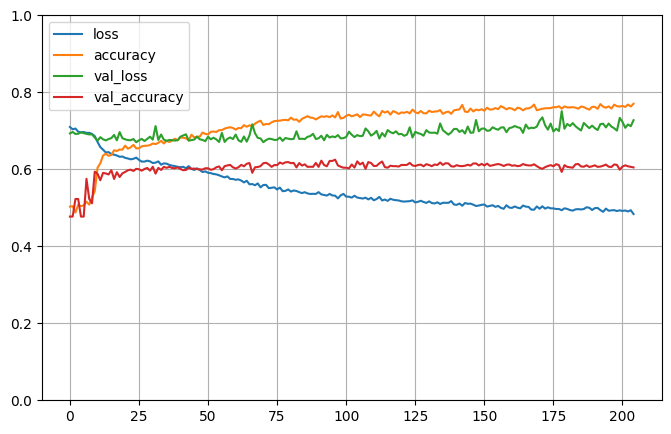


Testing # 2 1
2023-04-29 21:03:13.115242
PREDICT
Test 1:0 1429:1304 52.29%
Predict 1:0 1532:1201 56.06%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.531876 mean 0.25037128 std
Range of scores: 0.026458664 to 0.9971908
Score threshold 0.5
Confusion matrix
 [[734 570]
 [467 962]]
Normalized matrix
 [[0.26856934 0.20856202]
 [0.1708745  0.35199415]]
Extreme scores correct, pos:neg 675 506
Extreme scores incorrect pos:neg 337 258


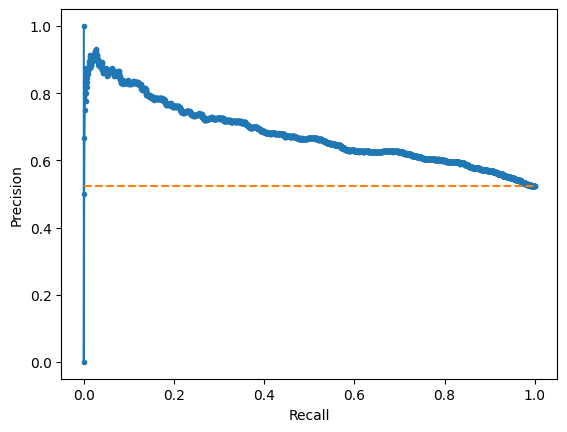

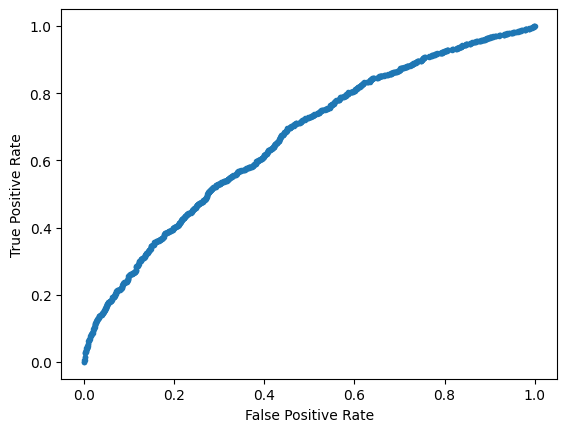

Accuracy: 62.06% Precision: 62.79% Recall: 67.32%
F1: 64.98% MCC: 0.2376
AUPRC: 67.90% AUROC: 66.39%
 accuracy [62.056348335162824]
 precision [62.793733681462136]
 recall [67.31980405878237]
 F1 [64.97804795677136]
 MCC [0.23758331393446308]
 AUPRC [67.89759806572391]
 AUROC [66.39301154438945]

Training # 2 2
2023-04-29 21:03:13.974403
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2382:2300 50.88%
Computed class weights: {0: 1.0178260869565217, 1: 0.9827875734676742}
Valid 1:0 1420:1313 51.96%
FIT


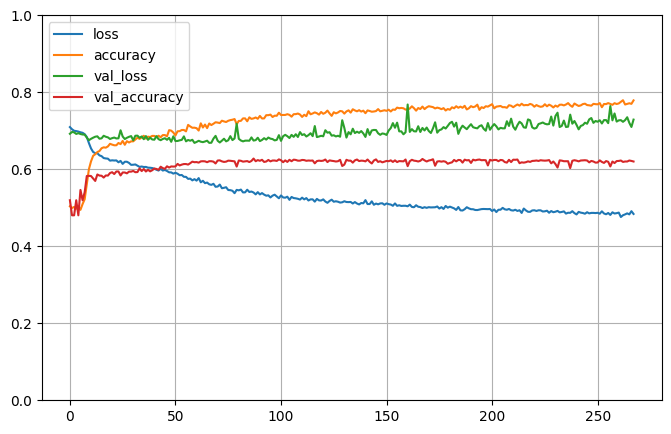


Testing # 2 2
2023-04-29 21:08:37.624439
PREDICT
Test 1:0 1420:1313 51.96%
Predict 1:0 1298:1435 47.49%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.47614023 mean 0.2707425 std
Range of scores: 0.009130722 to 0.9914884
Score threshold 0.5
Confusion matrix
 [[864 449]
 [571 849]]
Normalized matrix
 [[0.31613611 0.16428833]
 [0.20892792 0.31064764]]
Extreme scores correct, pos:neg 583 643
Extreme scores incorrect pos:neg 261 379


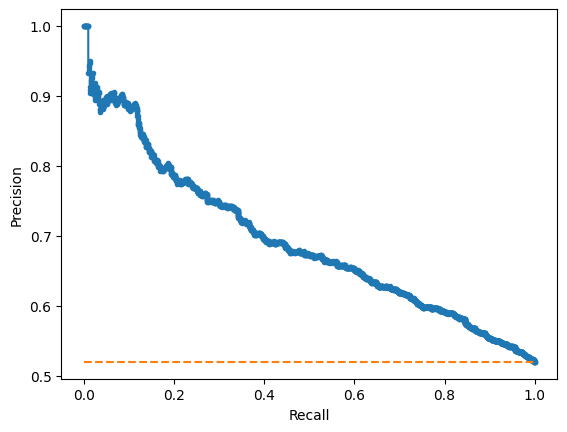

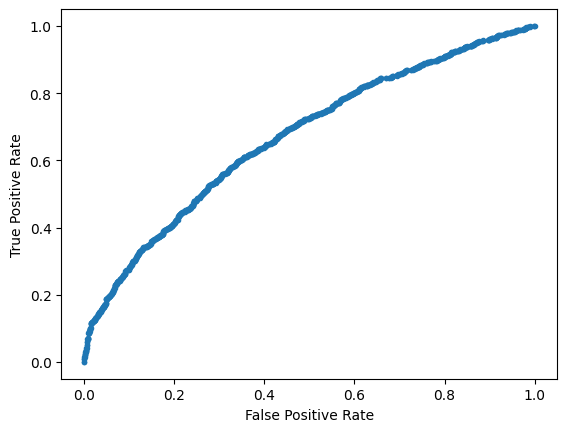

Accuracy: 62.68% Precision: 65.41% Recall: 59.79%
F1: 62.47% MCC: 0.2560
AUPRC: 69.20% AUROC: 66.91%
 accuracy [62.67837541163557]
 precision [65.40832049306626]
 recall [59.78873239436619]
 F1 [62.47240618101545]
 MCC [0.25604804687661364]
 AUPRC [69.19961549054736]
 AUROC [66.91449534986]

Training # 2 3
2023-04-29 21:08:38.386168
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2384:2352 50.34%
Computed class weights: {0: 1.0068027210884354, 1: 0.9932885906040269}
Valid 1:0 1478:1255 54.08%
FIT


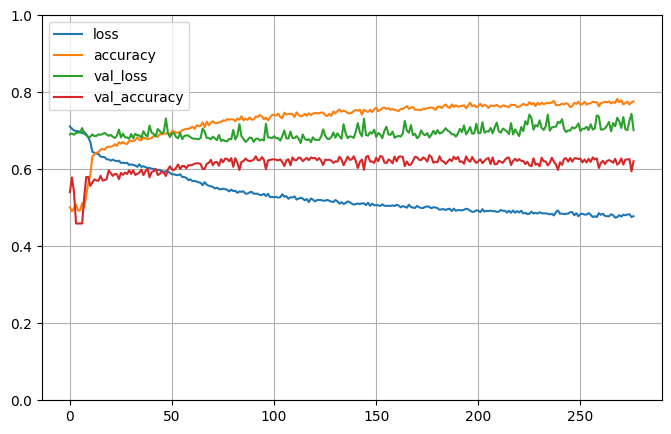


Testing # 2 3
2023-04-29 21:13:03.336905
PREDICT
Test 1:0 1478:1255 54.08%
Predict 1:0 1577:1156 57.70%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.55126107 mean 0.2580662 std
Range of scores: 0.016034203 to 0.9925703
Score threshold 0.5
Confusion matrix
 [[ 709  546]
 [ 447 1031]]
Normalized matrix
 [[0.25942188 0.19978046]
 [0.16355653 0.37724113]]
Extreme scores correct, pos:neg 771 466
Extreme scores incorrect pos:neg 343 242


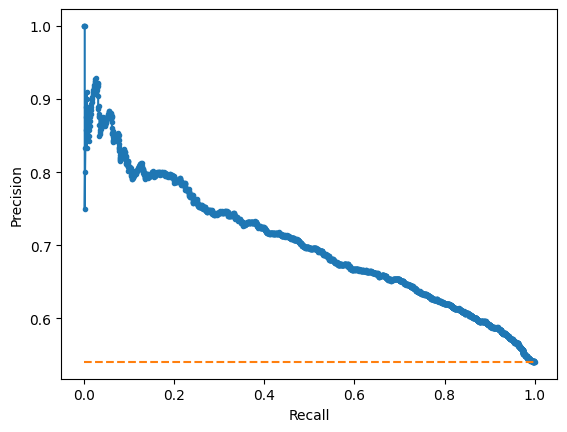

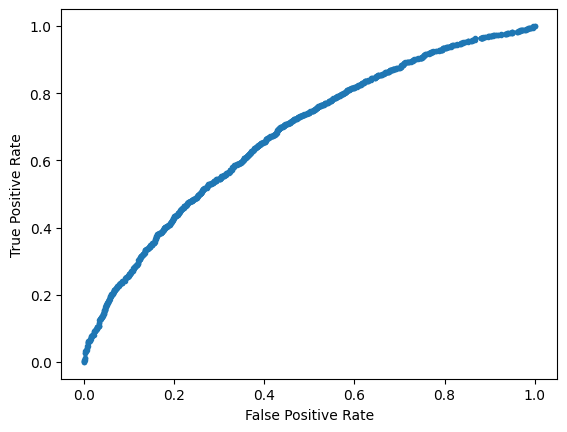

Accuracy: 63.67% Precision: 65.38% Recall: 69.76%
F1: 67.50% MCC: 0.2648
AUPRC: 70.22% AUROC: 67.74%
 accuracy [63.666300768386385]
 precision [65.37729866835764]
 recall [69.75642760487145]
 F1 [67.49590834697217]
 MCC [0.26478970387923584]
 AUPRC [70.21878747040677]
 AUROC [67.7449336618344]

Training # 2 4
2023-04-29 21:13:04.579644
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2368:2310 50.62%
Computed class weights: {0: 1.0125541125541127, 1: 0.9877533783783784}
Valid 1:0 1450:1282 53.07%
FIT


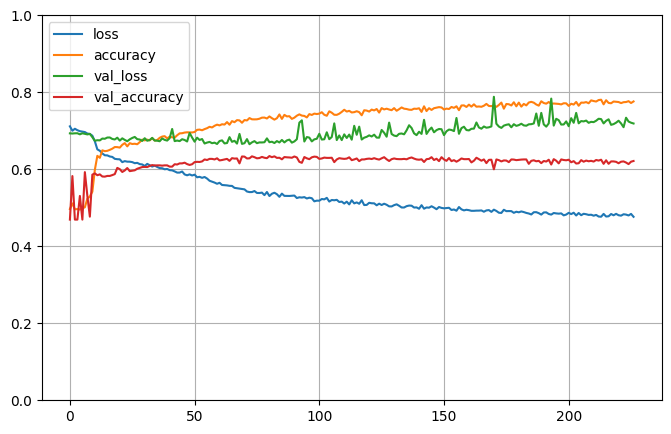


Testing # 2 4
2023-04-29 21:16:16.194372
PREDICT
Test 1:0 1450:1282 53.07%
Predict 1:0 1241:1491 45.42%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.46110532 mean 0.26044828 std
Range of scores: 0.016943578 to 0.9932592
Score threshold 0.5
Confusion matrix
 [[883 399]
 [608 842]]
Normalized matrix
 [[0.32320644 0.14604685]
 [0.22254758 0.30819912]]
Extreme scores correct, pos:neg 561 661
Extreme scores incorrect pos:neg 203 402


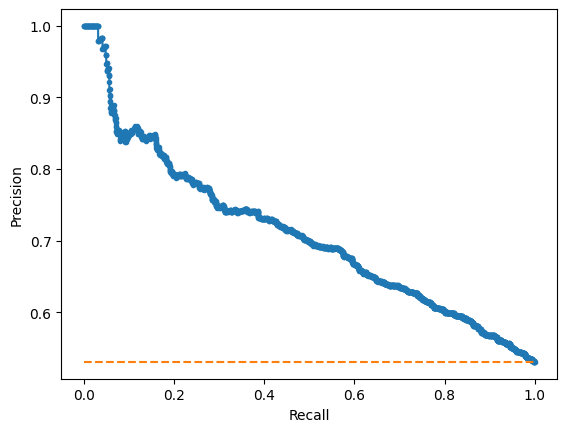

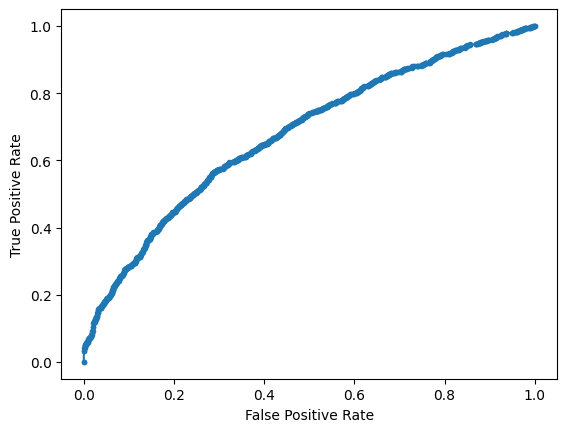

Accuracy: 63.14% Precision: 67.85% Recall: 58.07%
F1: 62.58% MCC: 0.2701
AUPRC: 70.89% AUROC: 67.69%
 accuracy [63.14055636896047]
 precision [67.84850926672038]
 recall [58.06896551724138]
 F1 [62.57896692679302]
 MCC [0.2700804218591884]
 AUPRC [70.89237991602016]
 AUROC [67.68602399268384]

Training # 2 5
2023-04-29 21:16:16.963466
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2384:2331 50.56%
Computed class weights: {0: 1.0113685113685114, 1: 0.9888842281879194}
Valid 1:0 1391:1341 50.92%
FIT


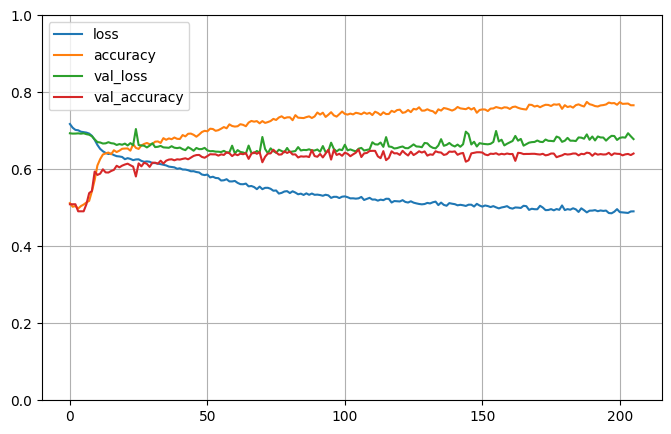


Testing # 2 5
2023-04-29 21:19:14.111338
PREDICT
Test 1:0 1391:1341 50.92%
Predict 1:0 1551:1181 56.77%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.5435206 mean 0.24775232 std
Range of scores: 0.052611098 to 0.9915293
Score threshold 0.5
Confusion matrix
 [[785 556]
 [396 995]]
Normalized matrix
 [[0.28733529 0.20351391]
 [0.14494876 0.36420205]]
Extreme scores correct, pos:neg 740 527
Extreme scores incorrect pos:neg 351 207


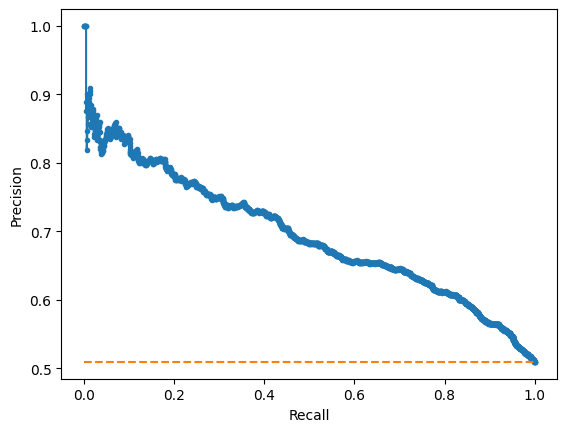

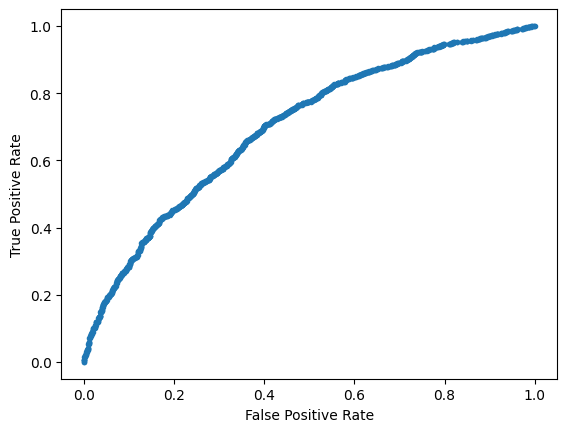

Accuracy: 65.15% Precision: 64.15% Recall: 71.53%
F1: 67.64% MCC: 0.3034
AUPRC: 69.41% AUROC: 69.87%
 accuracy [65.15373352855052]
 precision [64.15215989684074]
 recall [71.5312724658519]
 F1 [67.64106050305914]
 MCC [0.30344212012989014]
 AUPRC [69.40860106564494]
 AUROC [69.86936902887477]
2023-04-29 21:19:14.873863


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator('pc')  # use pc filename prefix for mRNA
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 63.33% std 1.07
 precision mean 65.50% std 1.88
 recall mean 64.19% std 8.22
 F1 mean 64.48% std 4.01
 MCC mean 0.2672 std 0.0181
 AUPRC mean 69.41% std 1.12
 AUROC mean 67.72% std 0.92
 accuracy [[62.641785583607756], [63.95901939260885], [64.32491767288694], [61.749633967789165], [63.94582723279648], [62.056348335162824], [62.67837541163557], [63.666300768386385], [63.14055636896047], [65.15373352855052]]
 precision [[64.22703510082151], [66.71214188267395], [64.2042042042042], [68.9989235737352], [65.25198938992042], [62.793733681462136], [65.40832049306626], [65.37729866835764], [67.84850926672038], [64.15215989684074]]
 recall [[61.34094151212553], [66.30508474576271], [73.82596685082873], [45.851216022889844], [68.09688581314879], [67.31980405878237], [59.78873239436619], [69.75642760487145], [58.06896551724138], [71.5312724658519]]
 F1 [[62.75082086829625], [66.50799047942877], [68.6797301638291], [55.09239363987967], [66.64409075516424], [64.97804795677136], [62.